# Datatalk Assignment: 2

In [1]:
# importing the necessarry libraries
import numpy as np
import pandas as pd
import seaborn as sns

### Preparing the dataset

In [2]:
# read the dataset
df = pd.read_csv('C:/Users/WOYES/Desktop/laptops.csv')

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
# normalizing the columns names
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
# dff missing values would be replaced by zero
dff=df[['ram','storage','screen','final_price']]
dff

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [5]:
# dfm missing values would be replaced by mean value
dfm=df[['ram','storage','screen','final_price']]
dfm

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

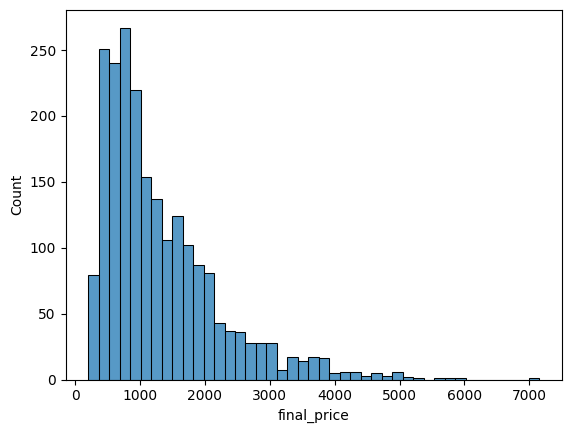

In [6]:
sns.histplot(dff['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

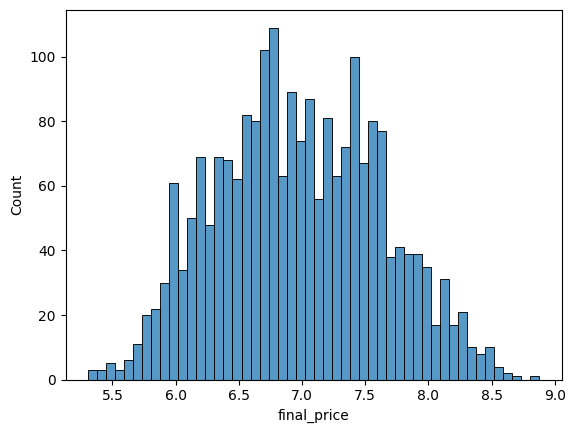

In [7]:
# transforming the price using log transformation

price_logs = np.log1p(dff['final_price'])
sns.histplot(price_logs, bins=50)

In [8]:
# checking the missing value in the dff dataset
dff.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [9]:
# checking missing value in the dfm dataset
dfm.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [10]:
# checking the statistical values in the dff dataset
dff.describe().round(2)

,ram,storage,screen,final_price
count,2160.00,2160.00,2156.00,2160.00
mean,15.41,596.29,15.17,1312.64
std,9.87,361.22,1.20,911.48
min,4.00,0.00,10.10,201.05
25%,8.00,256.00,14.00,661.08
50%,16.00,512.00,15.60,1031.95
75%,16.00,1000.00,15.60,1708.97
max,128.00,4000.00,18.00,7150.47


### fill in with zero

In [11]:
# replacing dff dataset missing values with zero
dff.fillna(0, inplace=True)

# rechecking for any missing value
dff.isnull().sum()

C:\Users\WOYES\AppData\Local\Temp\ipykernel_10308\100974646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.fillna(0, inplace=True)


ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [12]:
# replacing dfm missing values in 'screen' column with the mean value
dfm.fillna(df['screen'].mean(), inplace=True)

# rechecking for any missing value
dfm.isnull().sum()

C:\Users\WOYES\AppData\Local\Temp\ipykernel_10308\2654373411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm.fillna(df['screen'].mean(), inplace=True)


ram            0
storage        0
screen         0
final_price    0
dtype: int64

### Validation Framework

In [13]:
# setting up the validtion framework

n= len(dff)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test


#  setting the validation framework for dfm
m= len(dfm)
m_val = int(m*0.2)
m_test = int(m*0.2)
m_train = m-m_val-m_test



In [14]:
#  affirming the total number of observations in dff
n,n_val+n_test+n_train

(2160, 2160)

In [15]:
#  affirming the total number of observations in dfm
m,m_val+m_test+m_train

(2160, 2160)

In [16]:
# shuffling the samples number for train, val and test for dff
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# shuffling the samples number for train, val and test for dfm
idm = np.arange(m)
np.random.seed(42)
np.random.shuffle(idm)

In [17]:
# split the dff dataset into train val and test

dff_train = dff.iloc[:n_train]
dff_val =dff.iloc[n_train:n_train+n_val]
dff_test = dff.iloc[n_train+n_val:]


# split the dfm dataset into train val and test

dfm_train = dfm.iloc[:m_train]
dfm_val =dfm.iloc[m_train:m_train+m_val]
dfm_test = dfm.iloc[m_train+m_val:]

In [18]:
# randomly shuffling the splitted dataset
dff_train = dff.iloc[idx[:n_train]]
dff_val = dff.iloc[idx[n_train:n_train+n_val]]
dff_test = dff.iloc[idx[n_train+n_val:]]
dff_train.head()

# randomly shuffling the splitted dataset dfm
dfm_train = dfm.iloc[idm[:m_train]]
dfm_val = dfm.iloc[idm[m_train:m_train+m_val]]
dfm_test = dfm.iloc[idm[m_train+m_val:]]
dfm_train.head()


,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [19]:
# arranging the index in orders for both dff and dfm
dff_train = dff_train.reset_index(drop=True)
dff_val = dff_val.reset_index(drop=True)
dff_test = dff_test.reset_index(drop=True)

dfm_train = dfm_train.reset_index(drop=True)
dfm_val = dfm_val.reset_index(drop=True)
dfm_test = dfm_test.reset_index(drop=True)


In [20]:
#  splitting out and also transforming the predict for each train, val, and test dataset for dff and dfm
y_train = np.log1p(dff_train['final_price'].values)
y_val = np.log1p(dff_val['final_price'].values)
y_test = np.log1p(dff_test['final_price'].values)


ym_train = np.log1p(dfm_train['final_price'].values)
ym_val = np.log1p(dfm_val['final_price'].values)
ym_test = np.log1p(dfm_test['final_price'].values)

In [21]:
# dropping out the prediction columns from the train, val and test dataset
del dff_train['final_price']
del dff_val['final_price']
del dff_test['final_price']

# dropping out the prediction columns from the train, val and test dataset
del dfm_train['final_price']
del dfm_val['final_price']
del dfm_test['final_price']

In [22]:
# verifying the length of our y_train {n:b it must be equal to the dff_train}
len(y_train), len(ym_train)

(1296, 1296)

### Linear regression

In [23]:
# changing the train dataset into numpy arrays for dff and dfm
X_train=np.array(dff_train)
Xm_train = np.array(dfm_train)

In [24]:
# defining the linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
   

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [25]:
train_linear_regression(X_train, y_train)

(6.727163706112423, array([ 0.02630589,  0.00066041, -0.03651909]))

In [26]:
train_linear_regression(Xm_train, ym_train)

(6.8555380428905615, array([ 0.02650249,  0.00066642, -0.04534136]))

### RMSE

In [27]:
# checking the performance of the predicted target to the train

w0,w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

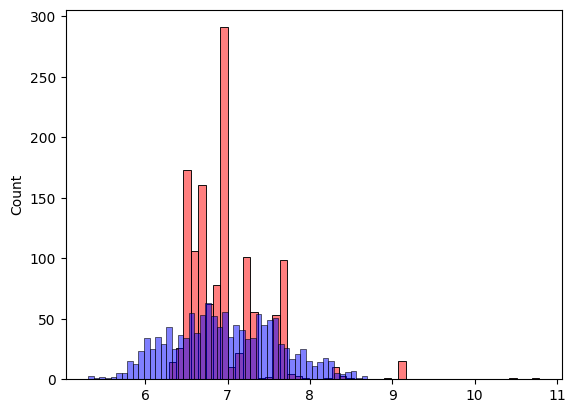

In [28]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [29]:
w0,w = train_linear_regression(Xm_train, ym_train)

ym_pred = w0 + Xm_train.dot(w)

<Axes: ylabel='Count'>

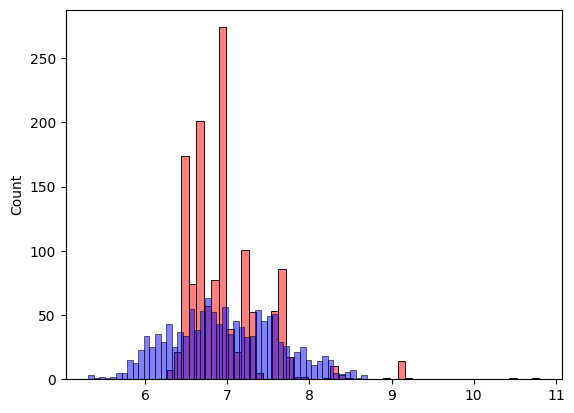

In [30]:
sns.histplot(ym_pred, color='red', alpha=0.5, bins=50)
sns.histplot(ym_train, color='blue', alpha=0.5, bins=50)

In [31]:
# defining an evaluating function (rmse) in the predicted target
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [32]:
# rmse value for dff (with missing value replace with zero)
rmse(y_train, y_pred).round(2)

0.45

In [33]:
# rmse value for dfm (with missing value replace with mean)
rmse(ym_train, ym_pred).round(2)

0.45

### Regularization

In [34]:
base = ['ram','storage','screen']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
# defining the regularization function
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
# testing various values of r

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(dff_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(dff_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score.round(2))

0 6.727163706112423 0.43
0.01 6.721004333260325 0.43
0.1 6.666075503828222 0.43
1 6.162616499461118 0.43
5 4.616086176497502 0.46
10 3.5167547207936285 0.51
100 0.6849263362660545 0.67


In [37]:
# verifying the effect of random seed on the prediction

rmse_scores = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    # Split the data for each seed
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    
    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train + n_val]
    test_idx = idx[n_train + n_val:]
    
    dff_train = dff.iloc[train_idx]
    dff_val = dff.iloc[val_idx]
    dff_test = dff.iloc[test_idx]
    
    # Fill missing values with 0
    dff_train = dff_train.fillna(0)
    dff_val = dff_val.fillna(0)
    dff_test = dff_test.fillna(0)
    
    
    X_train = prepare_X(dff_train)
    y_train = dff_train['final_price']
    w0,w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(dff_val)
    y_val= dff_val['final_price']
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    rmse_scores.append(score)
    
    print(f"Seed: {i}, Intercept: {w0}, Validation RMSE: {score.round(2)}")

Seed: 0, Intercept: 547.5696230186702, Validation RMSE: 565.45
Seed: 1, Intercept: 594.4197427999145, Validation RMSE: 636.8
Seed: 2, Intercept: 649.4685454769111, Validation RMSE: 588.96
Seed: 3, Intercept: 571.9459040112181, Validation RMSE: 597.81
Seed: 4, Intercept: 629.3882030645141, Validation RMSE: 571.96
Seed: 5, Intercept: 580.7647373330029, Validation RMSE: 573.24
Seed: 6, Intercept: 783.7683689905925, Validation RMSE: 647.34
Seed: 7, Intercept: 376.4358600624247, Validation RMSE: 550.44
Seed: 8, Intercept: 572.8852361198669, Validation RMSE: 587.33
Seed: 9, Intercept: 663.3792792607805, Validation RMSE: 576.1


In [38]:
# Compute and print the standard deviation
std_rmse = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")

Standard deviation of RMSE scores: 29.176


In [39]:
# Prepare indices and shuffle using seed 9
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# Split the data for each seed
n_train = int(0.6 * n)
n_val = int(0.2 * n)
    
train_idx = idx[:n_train]
val_idx = idx[n_train:n_train + n_val]
test_idx = idx[n_train + n_val:]
    
dff_train = dff.iloc[train_idx]
dff_val = dff.iloc[val_idx]
dff_test = dff.iloc[test_idx]
    
# Fill missing values with 0
dff_train = dff_train.fillna(0)
dff_val = dff_val.fillna(0)
dff_test = dff_test.fillna(0)

# Combine train and validation datasets
y_train = dff_train['final_price']
y_val= dff_val['final_price']
dff_train_full = pd.concat([dff_train, dff_val])
y_full_train = np.concatenate([y_train, y_val])

# Prepare feature matrix and train model with r=0.001 regularization
X_full_train = prepare_X(dff_train_full)
w0,w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Prepare test data and evaluate RMSE
X_test = prepare_X(dff_test)
y_test= dff_test['final_price']
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f" Validation RMSE: {score.round(2)}")

 Validation RMSE: 608.61
